# Introduction

The Euclidean Distance Geometry problem, aims at reconstructing the configuration of points given the partial information on pairwise inter-point distances.

### Mathematical Setup

Consider a collection of n points in a r-dimensional Euclidean space, ascribed to the columns of the matrix P = $[p_1, p_2,...,p_n]^T \in \mathbb{R}^{n \times r}$

The Squared distance between any two points $p_i$ and $p_j$ is given by,
$d_{i,j}^2 = \|p_i - p_j\|_2^2 = p_i^Tp_i + p_j^Tp_j - 2p_i^Tp_j$.

The Euclidean Distance Matrix D = $[d_{i,j}^2]$
$$ D = \textbf{1}diag(\textbf{PP}^T)^T + diag(\textbf{PP}^T)\textbf{1}^T - 2\textbf{PP}^T$$

X = $\textbf{PP}^T$ is the inner product matrix well known as the Gram matrix. 

### Nuclear Norm Minimization

Assuming that the entries of D are sampled uniformly at random. By definition, **X** is **symmetric** and **positive semidefinite**. 

Considering the constraint that the centroid of the points is located at the origin, $\sum_{k=1}^n \textbf{p_k} = 0$, which leads to **X.1 = 0**. In real situations d is at max 3 we can assume that **X** is low rank, r<<n, to recover **X**

$$
\min \ \|\textbf{X}\|_* \\
subject \ to \ \textbf{X}_{i,i} + \textbf{X}_{j,j} - 2\textbf{X}_{i,j} = \textbf{D}_{i,i} \ (i,j) \in \Omega \\
\textbf{X} \cdot \textbf{1 = 0}; \ \ \textbf{X = X}^T; \ \ \textbf{X}\geq \textbf{0}
$$

Here $\|\textbf{X}\|_*$denotes the nuclear norm, $\Omega$ denotes random set that consists all the sampled indices.

Theoretical analysis shows that the nuclear norm minimization approach yields a unique solution for the Euclidean Distance Geometry problem. Now we aim at implementing the practical algorithm to recover **X** the Gram matrix(inner product matrix)

### Algorithm

Since the nuclear norm of a positive semidefinite matrix equate to its trace the above optimization problem can be written as,
$$
\min_{\bar{X}\in \mathbb{R}^{n \times n}} Trace\left(\bar{\textbf{X}}\right) \\ 
subject \ to \ R_{\Omega}\left(\bar{X}\right) = R_{\Omega}\left(M\right) \\
\bar{\textbf{X}} \cdot \textbf{1 = 0}; \ \ \bar{\textbf{X}}\geq \textbf{0}
$$

Let a matrix, **C** $\in \mathbb{R}^{n \times (n-1)}$ satisfying $\textbf{C}^T\textbf{C} = I$ and $\textbf{C}^T\textbf{1} = \textbf{0}$

Rewriting the above optimization problem, by a change of variable $\bar{\textbf{X}} = \textbf{CXC}^T$.

$$
\min_{X \in \mathbb{R}^{(n-1) \times (n-1)}} Trace\left(\textbf{CXC}^T\right) \\ 
subject \ to \ R_{\Omega}\left(CXC\right) = R_{\Omega}\left(M\right) \\
\textbf{X}\geq \textbf{0}
$$

To enforce that **X** is positive semidefinite, let $\textbf{X} = \bar{\textbf{P}}\bar{\textbf{P}}^T$ where $\bar{\textbf{P}} \in \mathbb{R}^{(n-1) \times q}$. Since, $\bar{\textbf{P}}\bar{\textbf{P}}^T$ has at most rank q, a good estimate of q should be a reasonable of the rank. The minimization problem now reduces to

$$
\min_{\bar{P}\in \mathbb{R}^{(n-1) \times q}} Trace\left(\textbf{C}\bar{\textbf{P}}\bar{\textbf{P}}^T\textbf{C}^T\right) \\ 
subject \ to \ R_{\Omega}\left(\textbf{C}\bar{\textbf{P}}\bar{\textbf{P}}^T\textbf{C}^T\right) = R_{\Omega}\left(M\right)
$$

With $\textbf{P = C}\bar{\textbf{P}}$, the simplified minimization problem,

$$
\min_{P \in \mathbb{R}^{n \times q}} Trace\left(\textbf{PP}^T\right) \ subject \ to \ R_{\Omega}\left(\textbf{PP}^T\right) = R_{\Omega}\left(\textbf{M}\right)
$$

Once $\bar{\textbf{X}}$ is obtained, classical MDS can then be used to find the point coordinates. Therefore, solving for **P** above and then using MDS we can retrieve the topology.

We use the method of augmented Lagrangian to solve minimization problem. The constraint $R_{\Omega}\left(\textbf{PP}^T\right) = R_{\Omega}\left(\textbf{M}\right)$ can be written using the linear operator **A** defined as,

$$
A: \mathbb{R}^{n \times n} \to \mathbb{R}^{|\Omega| \times 1} with, \\
A(X) = f \in \mathbb{R}^{|\Omega| \times 1}, f_i = \langle X,w_{\alpha_i} \rangle \ for \ \alpha_i \in \Omega
$$

For $y \in \mathbb{R}^{|\Omega| \times 1}$, $\langle AX,y \rangle = \sum_i \langle X,w_{\alpha_i} \rangle y_i = \langle X,\sum_i y_iw_{\alpha_i}\rangle$. From this, the adjoint of A,$A^*$ is as follows,
$A^*y = \sum_i y_iw_{\alpha_i}$

In practical settings, the available partial information is not exact but noisy. Considering an additive Gaussian noise **Z** with mean $\mu$ and variance $\sigma$. The modified minimization problem can be written as

$$
\min \|\textbf{X}\|_* \\
subject \ to \ \|R_{\Omega}\left(\textbf{X}\right) - R_{\Omega}\left(\textbf{M}\right)\|_F \leq \delta
$$

Using the operator A introduced earlier, the above equation can be rewritten as,

$$
\min_P Trace\left(\textbf{PP}^T\right) + \frac{\lambda}{2}\|A(\textbf{PP}^T - \textbf{b}\|_F^2
$$

where $\textbf{b} = A(\textbf{M})$. The augmented Lagrangian is given by 
$$
\textbf{L}\left(\textbf{P};\Lambda\right) = Trace\left(\textbf{PP}^T\right) + \frac{\lambda}{2}\|A(\textbf{PP}^T - \textbf{b}\|_2^2
$$

where $\Lambda \in \mathbb{R}^{n \times 1}$ denotes the Lagrangian multiplier and $\lambda$ is the penalty term. $\textbf{P}$ is computed using the Brazilai-Borwein steepest descent method with,

objective function  $Trace\left(\textbf{PP}^T\right) + \frac{\lambda}{2}\|A(\textbf{PP}^T - \textbf{b}\|_2^2$

and gradient  $2\textbf{P} + 2{\lambda}A^*\left(A\left(\textbf{PP}^T\right)-\textbf{b}\right)\textbf{P}$.

#### Pseudo Code

**Initialization**: Set
q = 10,
$\textbf{P}^0 = rand(n,q)$,
$E_{Total}^0 = 0$,
maxiterations,bbiterations,$\lambda$,Tol

**for** k=1:maxiterations **do**

$\hspace{1.5cm} Barzilai-Borwein(BB) \ descent \ for \ \textbf{P}_k$

$\hspace{1.5cm}E_{Total}^k = Trace\left(\textbf{P}^k\left(\textbf{P}^k\right)^T\right) + \frac{\lambda}{2}\|A\left(\textbf{P}^k\left(\textbf{P}^k\right)^T\right) - \textbf{b}\|_2^2$
    
**if** $E_{Total}^k < Tol$ **then**

# Importing Libraries

In [1]:
import os
import time
import h5py
import math
import scipy
import random
import psutil
import platform
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
from math import sin,cos
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots

%matplotlib inline

import plotly.io as pio
pio.renderers.default='notebook'

import warnings
warnings.filterwarnings('ignore')

### Lat and Long to 3D Coordinates

In [2]:
def getXYZ(lat,lon,R):
    lat=(lat*math.pi/180)
    lon=(lon*math.pi/180)
    x = R * cos(lat) * cos(lon)
    y = R * cos(lat) * sin(lon)
    z = R *sin(lat)
    return (x, y, z)

###  3D Coordinates to Lat and Long

In [3]:
def getLatLon(x,y,z,R) :
    lat  = math.asin(z/R)
    lon = math.atan(y/x)
    return (lat/(math.pi)*180 , lon/(math.pi)*180)

# EDM Solver Class

In [4]:
class EDMSolver():
    """
    EDM SOlver Using Low rank Matrix Completion
    """
    def __init__(self,points,opts,lsopts):
        
        """
        Initializing Variables
    
        Parameters
        -----------
        points : 3D array of shape (...,3) 
            3D Point Cloud
        opts : Params Class obj
            general options
        lsopts - Params Class obj
            options for BB gradient method
    
        """
        
        self.points = points
        self.opts = opts
        self.lsopts = lsopts
        self.pts = self.points.T
        
    def getEDM(self,points):
        """
        Computes the Euclidean Distance Matrix
        
        Parameters
        ----------
        points : 3D array of shape (n,3)
            3D point Cloud
        
        Returns
        -------
        An array of Distances of shape n x n
        """
        
        num_pt = points.shape[0]
        pts = points.T
        PP = np.matmul(pts.T,pts)
        Dist = PP.diagonal().reshape(-1,1) + PP.diagonal().reshape(-1,1).T - 2*PP
        for i in range(num_pt):
            Dist[i,i] = 0
        
        return Dist
        
    def getWeight(self):
        """
        Generating Weight for random missing distances

        Parameters
        ----------
        None
        
        Returns
        -------
            Mask/Weight matrix, Weight == 1 means available distance
        """
        num_pt = self.points.shape[0]
        rate = self.opts.rate
        Weight = np.random.rand(num_pt,num_pt)
        Weight[Weight > 1-rate] = 1
        Weight[Weight < 1] = 0
        Weight[Weight > 0] = 1
        
        for i in range(num_pt):
            Weight[i,i] = 1
            for j in range(i+1,num_pt):
                Weight[i,j] = Weight[j,i]
        
        self.ratio = ((len(np.where(Weight == 1)[0])-num_pt)/(num_pt**2))*100
        print('%f percent of the EDM Distances are known\n'%(self.ratio))
        
        return Weight
    
    def AOp(self,X):
        """
        The linear operator A for:
        R_{\Omega}(X) = R_{\Omega}(M)
        
        Parameters
        ----------
        X: array_like
            The array input to the linear operator
        
        Returns
        -------
        y : array_like
            y = A(X)
        """
        # diagonal of XX'
        X_diag = np.sum(np.multiply(X,X),axis=1,keepdims=True)
        # off diagonal of XX'
        X_offdiag = np.sum(np.multiply(X[self.I,:],X[self.J,:]),axis=1,keepdims=True)
        Y = X_diag[self.I] + X_diag[self.J] - 2*X_offdiag;
        return Y
    
    def AOpstar(self,y):
        """
        The Adjoint operator of the linear operator A, A*
        A*(y) = \sum_{i} y^{1}_{alpha_i} w_{alpha_i}
        
        Parameters
        ----------
        y : array_like
        
        Returns
        -------
        X : array_like
        """
        X = np.zeros((self.dim,self.dim))
        X = X.reshape(-1,1)
        X[self.edgeind] = -2*y
        X_copy = X.reshape(self.dim,self.dim)
        X[self.diagind] = -np.sum(X_copy,1,keepdims=True)
        X = X.reshape((self.dim,self.dim))
        return X
    
    def gradient(self,P):
        """
        The gradient function for the BBGradient
        
        Parameters
        ----------
        P : array_like
            Input to the BB Gradient Descent
        
        Returns
        -------
        F : int
            The value of the objective function
        G : array_like
            The gradient
        """
        tmp1 = self.AOp(P) - self.b;
        # The Objective Function
        F = np.sum(np.sum(np.multiply(P,P),axis=1)) + 0.5*self.lambda_*np.linalg.norm(tmp1,'fro')**2
        # The Gradient
        G = 2*P + np.matmul(2.0*self.lambda_*self.AOpstar(tmp1),P)
        return F,G
    
    def addNoise(self):
        """
        Helper function to add noise to the distance matrix
        """
        # Gram Matrix(Inner Product Matrix)
        self.lambda_ = self.opts.lambda_
        self.Rk = self.opts.rank
        self.dim,_ = self.Dist.shape
        
        # Gram Matrix(Inner Product Matrix)
        self.Gram_Truth = self.Dist - np.matmul(np.mean(self.Dist,axis=1,keepdims=True),np.ones((1,self.dim)))
        self.Gram_Truth = -0.5*(self.Gram_Truth - np.matmul(np.ones((self.dim,1)),np.mean(self.Gram_Truth,axis=0,keepdims=True)))

        # Obtaining Omega i.e., indices of randomly choosen entries of D
        self.I,self.J = np.where(self.Weight == 1)
        
        # Diagonal indices 
        self.diagind = np.array(range(1,self.dim+1)) + self.dim*np.array(range(self.dim)) - 1
        
        # Edge indices of choosen entries of D (includes symmetrical indices)
        self.edgeind = self.I + (self.J)*self.dim
        
    
        M_noisefree = self.Dist.reshape(-1,1)[self.edgeind]
        # Minimum sampled distance
        mindist = np.min(M_noisefree[M_noisefree > 0])
        
        # Adding noise in the range of the minimum measured distance
        #and ensuring all distances are positive
        M = M_noisefree + 4*mindist + mindist*np.random.standard_normal(M_noisefree.shape);
        M[M_noisefree == 0] = 0
        self.b = M
     
    def BBGradient(self,x):
        """
        The Brazilai-Borwein steepest descent method
        """
        # The Objective and the gradient initialization
        [f,g] = self.gradient(x)
        
        # Norm of the Gradient
        gnorm = np.linalg.norm(g,'fro')
        
        # Initialize Q, C and alpha
        Q = 1;
        C = f;
        alpha = self.lsopts.alpha

        # Initializing xmin and fmin
        xmin = x
        fmin = f

        n = x.shape[0]
        
        # Maximum and Minimum values of alpha
        MAXalpha = 1e16
        MINalpha = 1e-16

        for it in range(self.lsopts.maxit):
            xold = x
            fold = f
            gold = g

            numlinesearch = 1
            wolfe_factor = self.lsopts.rho*gnorm**2

            while True:
                x = xold - alpha*gold
                [f,g] = self.gradient(x)

                if f <= C - alpha*wolfe_factor or numlinesearch >= 5:
                    break
                alpha = self.lsopts.sigma*alpha
                numlinesearch = numlinesearch + 1

            if f < fmin:
                xmin = x
                fmin = f
            
            # Stopping Conditions
            gnorm = np.linalg.norm(g,'fro')
            s = x - xold
            xstop = np.linalg.norm(s,'fro')/np.sqrt(n)
            fstop = abs(fold - f)/(abs(fold) + 1)

            if (xstop < self.lsopts.xtol and self.lsopts.ftol) or (gnorm < self.lsopts.gtol):
                break
            
            # Updates
            y = g - gold
            normy = np.linalg.norm(y,'fro')
            sy = abs(np.trace(np.matmul(s.T,y)))

            if (it+1)%2 == 0:
                alpha = (np.linalg.norm(s,'fro')**2)/sy
            else:
                alpha = sy/(normy**2)
            
            # To make sure alpha lies in bound
            alpha = min(alpha,MAXalpha)
            alpha = max(alpha,MINalpha)
            
            # Updating Cost
            Qold = Q
            Q = self.lsopts.eta*Qold + 1
            C = (self.lsopts.eta*Qold*C + f)/Q

        x = xmin

        return x
        
    def matrixCompletion(self):
        """
        Performs the BB method to solve for P, getting the gram matrix and 
        reconstructed Gram matrix and performing canonical Multidimensional 
        scaling(MDS)
        """
        ## Initializing Values
        # P, lagrangian Multipliers
        P = np.random.random((self.dim,self.Rk))
        # Energies
        E = np.zeros((self.opts.maxit,1))
        # Iteration counter, relative error
        num_it = 0
        cre = 1
        
        # Barzilai-Borwein(BB) descent to solve for P
        
        for i in range(self.opts.maxit):
            num_it = num_it + 1
            # Gradient descent for P
            P = self.BBGradient(P)
            # Calculating total energy
            E[i] = np.sum(np.multiply(P,P)) + 0.5*self.lambda_*np.linalg.norm(self.AOp(P)-self.b,'fro')**2
            
            # To print energy
            if self.opts.printenergy == 1:
                print("Iteration %d, TotalE = %f\n" % (i,E[i]))
            
            # Calculating relative error
            if i > 0:
                cre = abs(E[i] - E[i-1])/E[i]
            
            # stopping condition
            if cre < 1e-5:
                break
        
        # Plotting Energies with respect to iteration number
        if self.opts.plotting == 1:
            plt.figure(figsize=(12,8))
            plt.semilogy(range(num_it),E[:num_it],linewidth=2)
            plt.xlabel("Iteration number",fontsize=18)
            plt.ylabel("$\log(E)$",fontsize=18)
            plt.grid()
            plt.show()

        # Obtaining the Gram Matrix
        Gram = np.matmul(P,P.T)
        
        # Reconstructing the Gram Matrix and Multidimensional Scaling (MDS)
        self.Gram_Recon = Gram - (1/self.dim)*np.tile(np.sum(Gram,axis=0,keepdims=True),(self.dim,1)) + (1/(self.dim**2))*np.tile(np.sum(Gram),(self.dim,self.dim))
        self.Gram_Recon = (self.Gram_Recon + self.Gram_Recon.T)/2
        
        self.Gram_err = np.linalg.norm(self.Gram_Truth - self.Gram_Recon,'fro')/np.linalg.norm(self.Gram_Truth,'fro')
        D,V = scipy.sparse.linalg.eigs(self.Gram_Recon,self.opts.rank,which='LM')
        D = D.reshape(-1,1)

        D,IJ = -np.sort(-D,axis=0),np.argsort(-D,axis=0)
        V = V[:,IJ]
        temp = np.real(V[:,0:3])
        temp = temp.reshape(temp.shape[0],temp.shape[1]*temp.shape[2])
        Global_Coordinate = np.matmul(temp,np.diag(np.sqrt(D[0:3]).reshape(-1)))
        
        output = dict()
        
        output['E'] = E[num_it-1]
        output['ReconError'] = self.Gram_err
        output['numit'] = num_it

        return Global_Coordinate,self.Gram_Recon,output
    
    # helper function 1
    def plot3d(self,coords,title=None):
        """
        Helper function to plot the 3D plots
        
        Parameters
        ----------
        coords : array_like
            The 3D point cloud locations (x,y,z)
        """
        x, y, z = coords[:,0],coords[:,1],coords[:,2]
        data = go.Scatter3d(x=x,y=y,z=z,mode='markers',
                marker=dict(size=5,color=z,colorscale='Viridis')) # set color to an array/list of desired values
        fig = go.Figure(data=[data])

        # tight layout
        fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),title=title)
        fig.show()
      
    # helper function 2
    def rigid_transform_3D(self,A, B):
        """
        Helper function to fix the orientation of the reconstructed poit cloud
        
        Parameters
        ----------
        A : array_like of shape (3,...)
        B : array_like of shape (3,...)
        
        Returns
        --------
        R : array_like of shape (3,3)
            Rotation Matrix
        
        t : array_like of shape(3,1)
            Translation Matrix
        
        Refrence
        ---------
        This function has been directly used from the below github repository
        
        https://github.com/nghiaho12/rigid_transform_3D
        """
        assert A.shape == B.shape

        num_rows, num_cols = A.shape
        if num_rows != 3:
            raise Exception(f"matrix A is not 3xN, it is {num_rows}x{num_cols}")

        num_rows, num_cols = B.shape
        if num_rows != 3:
            raise Exception(f"matrix B is not 3xN, it is {num_rows}x{num_cols}")

        # find mean column wise
        centroid_A = np.mean(A, axis=1)
        centroid_B = np.mean(B, axis=1)

        # ensure centroids are 3x1
        centroid_A = centroid_A.reshape(-1, 1)
        centroid_B = centroid_B.reshape(-1, 1)

        # subtract mean
        Am = A - centroid_A
        Bm = B - centroid_B

        H = Am @ np.transpose(Bm)

        # sanity check
        #if linalg.matrix_rank(H) < 3:
        #    raise ValueError("rank of H = {}, expecting 3".format(linalg.matrix_rank(H)))

        # find rotation
        U, S, Vt = np.linalg.svd(H)
        R = Vt.T @ U.T

        # special reflection case
        if np.linalg.det(R) < 0:
            print("det(R) < R, reflection detected!, correcting for it ...")
            Vt[2,:] *= -1
            R = Vt.T @ U.T

        t = -R @ centroid_A + centroid_B

        return R, t
        
    # helper function 4
    def run(self):
        """
        Helper function to combine all the above functions and run it in a
        sequential manner
        
        Returns
        --------
        output : dict
            keys:
                rate         : smapling rate
                points       : actual 3D point cloud
                tpoints      : transformed reconstructed point cloud
                system       : system parameters
                release      : system parameters
                Version      : system parameters
                Machine      : system parameters
                Processor    : system parameters
                error        : Obtained error
                numit        : Number of BB iterations 
                timeelapsed  : Total time elapsed in computing
        """
        # Recording starting time
        start = time.time()
        
        # Obtaining the EDM Matrix
        self.Dist = self.getEDM(self.points)
        self.scaler = np.max(self.Dist)
        
        # Normalizing the entries of EDM matrix
        self.Dist = self.Dist/self.scaler
        
        # Getting the mask
        self.Weight = self.getWeight()
        
        # Adding noise to the randomly choosen distances
        self.addNoise()
        
        # Matrix Completion and Multi Dimensional Scaling(MDS)
        self.GCor, ipm, _output = self.matrixCompletion()
        
        self.GCor = np.real(self.GCor)
        
        # Rescaling the points to original ranges
        self.GCor = self.GCor*np.sqrt(self.scaler)        
        
        if self.opts.plotting:
            # 3D View of Constructed points
            self.plot3d(self.GCor,'Constructed Points')
            # 3D View of Actual points
            self.plot3d(self.pts.T,'Actual Points')
        
        # 3D transformation to original orientation
        R,t = self.rigid_transform_3D(self.GCor.T,self.points.T)
        self.transformed_points = (R @ self.GCor.T) + t
        self.transformed_points = self.transformed_points.T
        
        if self.opts.plotting:
            # plotting the 3D transformed points
            self.plot3d(self.transformed_points,'Transformed Reconstructed Points')
        
        # Record finish time
        end = time.time()

        # Error Valuation
        error = np.linalg.norm(self.points-self.transformed_points,'fro')/np.linalg.norm(self.points,'fro') # relative error
        output = dict()
        
        uname = platform.uname()
        output['ratio'] = self.ratio
        output['rate'] = self.opts.rate
        output['points'] = self.points
        output['tpoints'] = self.transformed_points
        output['System'] = uname.system
        output['Release'] = uname.release
        output['Version'] = uname.version
        output['Machine'] = uname.machine
        output['Processor'] = uname.processor
        output['error'] = error
        output['numit'] = _output['numit']
        output['timeelapsed'] = end - start
        
        return output

## Parameters Class

In [5]:
class params():
    lambda_ = None
    printenergy = None
    plotting = None
    rank = None
    rate = None
    maxit = None
    tol = None
    maxit = None
    xtol = None
    gtol = None
    ftol = None
    alpha = None
    rho = None
    sigma = None
    eta = None

# Dataset Generation

## Dataset 1: Mapping the major cities of a country

### Loading Countries Location Data

In [6]:
WorldData = pd.read_csv('./data/worldcitiespop.csv')
WorldData

Country         City   AccentCity Region  Population   Latitude  \
0            ad        aixas        Aixàs      6         NaN  42.483333   
1            ad   aixirivali   Aixirivali      6         NaN  42.466667   
2            ad   aixirivall   Aixirivall      6         NaN  42.466667   
3            ad    aixirvall    Aixirvall      6         NaN  42.466667   
4            ad     aixovall     Aixovall      6         NaN  42.466667   
...         ...          ...          ...    ...         ...        ...   
3173953      zw   zimre park   Zimre Park      4         NaN -17.866111   
3173954      zw  ziyakamanas  Ziyakamanas      0         NaN -18.216667   
3173955      zw   zizalisari   Zizalisari      4         NaN -17.758889   
3173956      zw      zuzumba      Zuzumba      6         NaN -20.033333   
3173957      zw   zvishavane   Zvishavane      7     79876.0 -20.333333   

         Longitude  
0         1.466667  
1         1.500000  
2         1.500000  
3         1.500000  
4         1.483333  
...            ...  
3173953  31.213611  
3173954  27.950000  
3173955  31.010556  
3173956  27.933333  
3173957  30.033333  

[3173958 rows x 7 columns]

### Selecting A Country: India

In [7]:
Data = WorldData[WorldData['Country'] == 'in']
Data = Data.reset_index(drop = True)
Data.shape

(39813, 7)

### Extracting and saving 3D Point Cloud

In [8]:
points1 = []
for i in random.sample(range(0, Data.shape[0]), 2500):
    points1.append(getXYZ(Data['Latitude'][i],Data['Longitude'][i],6371))
    
points1 = np.array(points1)
print(points1.shape)

np.savetxt('./data/india_latlon.csv', points1, delimiter=',')

(2500, 3)


### Viewing the 3D point Cloud

In [9]:
x, y, z = points1[:,0],points1[:,1],points1[:,2]
data1 = go.Scatter3d(x=x,y=y,z=z,mode='markers',
        marker=dict(size=5,color=z,colorscale='Viridis')) # set color to an array/list of desired values
fig = go.Figure(data=[data1])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Dataset 2: Sewage Pipes Data

### Extracting and saving 3D Point Cloud

In [10]:
path = './data/training_pointcloud_hdf5_real.h5'
with h5py.File(path, 'r') as hdf: 
    Data = np.asarray(hdf['Training/PointClouds'][:])
Data = np.array(Data)
print(Data.shape)

np.savetxt('./data/pipe.csv',Data[0,:,:],delimiter=',')

points2 = Data[0,:,:]

(274, 1024, 3)


### Viewing the 3D point Cloud

In [11]:
x, y, z = points2[:,0],points2[:,1],points2[:,2]
data2 = go.Scatter3d(x=x,y=y,z=z,mode='markers',
        marker=dict(size=5,color=z,colorscale='Viridis')) # set color to an array/list of desired values
fig = go.Figure(data=[data2])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# Dataset 3 : Location data collected from our peers

In [12]:
Data = pd.read_csv('./data/dist.csv')
Data.insert(3,"Color", ['act','act','act','act','act','act','act','act','act','act','act','act','act','act','act'], True)
points3 = []
for i in range(Data.shape[0]):
    points3.append(getXYZ(Data['lat'][i],Data['lng'][i],6371))
    
points3 = np.array(points3)

## Visualisation

In [13]:
fig = px.scatter_geo(Data,lat='lat',lon='lng',hover_name="City/Place",text="Name",color='Color',scope='asia',center={'lat':Data['lat'][3],'lon':Data['lng'][3]})
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

## Dataset 4 : Intramolecular Data to identify protein structure

In [14]:
f = open("./data/atom.txt", "r")
Lines = f.readlines()
count = 0
points4 = []
for line in Lines:
    count += 1
    x=line.split()
    try: 
        t=[float(x[6]),float(x[7]),float(x[8])]
        points4.append(t)
    except:
        continue
points4 = np.array(points4)

## Visualisation

In [15]:
x, y, z = points4[:,0],points4[:,1],points4[:,2]
data4 = go.Scatter3d(x=x,y=y,z=z,mode='markers',
        marker=dict(size=3,color=z,colorscale='Viridis')) # set color to an array/list of desired values
fig = go.Figure(data=[data4])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Running the Solver

### Defining EDMSolver Class Parameters

In [16]:
opts = params()
lsopts = params()

# Matrix Completion parameters
opts.lambda_ = 5
opts.rate = 0.08
opts.printenergy = 0
opts.plotting = 0
opts.rank = 10
opts.maxit = 30
opts.tol = 1e-5

# BBGradient parameters
lsopts.maxit = 20
lsopts.xtol = 1e-8
lsopts.gtol = 1e-8 
lsopts.ftol = 1e-10 
lsopts.alpha  = 1e-3 
lsopts.rho  = 1e-4 
lsopts.sigma  = 0.1 
lsopts.eta  = 0.8 

### Defining and Running the Solver

In [17]:
solver1 = EDMSolver(points1,opts,lsopts)
solver2 = EDMSolver(points2,opts,lsopts)
solver3 = EDMSolver(points3,opts,lsopts)
solver4 = EDMSolver(points4,opts,lsopts)

output1 = solver1.run()
output2 = solver2.run()
output3 = solver3.run()
output4 = solver4.run()

outputs = [output1,output2,output3,output4]
solvers = [solver1,solver2,solver3,solver4]
for i in range(len(outputs)):
    outputs[i]['Dataset'] = 'Dataset '+str(i+1)

8.003296 percent of the EDM Distances are known

7.968140 percent of the EDM Distances are known

10.666667 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...
7.986740 percent of the EDM Distances are known



In [18]:
# Actual points
points1,ponts2,points3,points4 = output1['points'],output2['points'],output3['points'],output4['points']

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "scene"}, {"type": "scene"}],
           [{"type": "scene"}, {"type": "scene"}]],
)

fig.add_trace(go.Scatter3d(x=points1[:,0], y=points1[:,1], z=points1[:,2],mode='markers',marker=dict(size=2,color=points1[:,2],colorscale='Viridis')),
              row=1, col=1)

fig.add_trace(go.Scatter3d(x=points2[:,0], y=points2[:,1], z=points2[:,2],mode='markers',marker=dict(size=2,color=points2[:,2],colorscale='Viridis')),
              row=1, col=2)

fig.add_trace(go.Scatter3d(x=points3[:,0], y=points3[:,1], z=points3[:,2],mode='markers',marker=dict(size=2,color=points3[:,2],colorscale='Viridis')),
              row=2, col=1)

fig.add_trace(go.Scatter3d(x=points4[:,0], y=points4[:,1], z=points4[:,2],mode='markers',marker=dict(size=2,color=points4[:,2],colorscale='Viridis')),
              row=2, col=2)

fig.update_layout(height=1000, showlegend=False)
fig.show()

In [19]:
# Transformed points
tpoints1,tpoints2,tpoints3,tpoints4 = output1['tpoints'],output2['tpoints'],output3['tpoints'],output4['tpoints']

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "scene"}, {"type": "scene"}],
           [{"type": "scene"}, {"type": "scene"}]],
)

fig.add_trace(go.Scatter3d(x=tpoints1[:,0], y=tpoints1[:,1], z=tpoints1[:,2],mode='markers',marker=dict(size=2,color=tpoints1[:,2],colorscale='Viridis')),
              row=1, col=1)

fig.add_trace(go.Scatter3d(x=tpoints2[:,0], y=tpoints2[:,1], z=tpoints2[:,2],mode='markers',marker=dict(size=2,color=tpoints2[:,2],colorscale='Viridis')),
              row=1, col=2)

fig.add_trace(go.Scatter3d(x=tpoints3[:,0], y=tpoints3[:,1], z=tpoints3[:,2],mode='markers',marker=dict(size=2,color=tpoints3[:,2],colorscale='Viridis')),
              row=2, col=1)

fig.add_trace(go.Scatter3d(x=tpoints4[:,0], y=tpoints4[:,1], z=tpoints4[:,2],mode='markers',marker=dict(size=2,color=tpoints4[:,2],colorscale='Viridis')),
              row=2, col=2)

fig.update_layout(height=1000, showlegend=False)
fig.show()

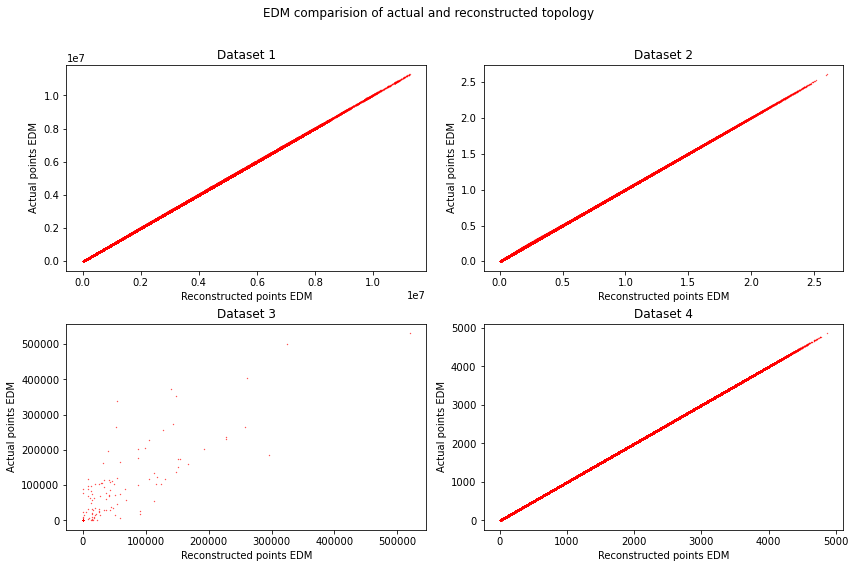

In [20]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
for i in range(len(outputs)):
    solver,output = solvers[i],outputs[i]
    dact = np.tril(solver.getEDM(output['points'])).ravel()
    dObs = np.tril(solver.getEDM(output['tpoints'])).ravel() 
    ax[int(i/2),int(i%2)].scatter(dObs,dact,color='r',s=0.1)
    ax[int(i/2),int(i%2)].set_title('{}'.format(output['Dataset']))
    ax[int(i/2),int(i%2)].set_xlabel('Reconstructed points EDM')
    ax[int(i/2),int(i%2)].set_ylabel('Actual points EDM')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('EDM comparision of actual and reconstructed topology')
plt.show()

Here we have seen different datasets and sampled them to obtain our dataset. The EDM after construction has been sampled at certain rate and the following errors and properties have been noted.

In [21]:
print(' Dataset    Rate   Ratio    Error(%)   Num Iterations  Num Points Time Elapsed(s)')
for output in outputs:
    print(output['Dataset'],"  %0.2f   %0.2f   %2.6f        %0.2f         %5d    %0.4f"%(output['rate'],output['ratio'],output['error']*100,output['numit'],output['points'].shape[0],output['timeelapsed']))

 Dataset    Rate   Ratio    Error(%)   Num Iterations  Num Points Time Elapsed(s)
Dataset 1   0.08   8.00   0.189246        26.00          2500    79.2980
Dataset 2   0.08   7.97   0.311351        17.00          1024    8.7557
Dataset 3   0.08   10.67   2.217214        6.00            15    0.0190
Dataset 4   0.08   7.99   0.027376        27.00          4384    258.3121


## Error Analysis: Dataset 1

### Defining EDMSolver Class Parameters

In [22]:
opts = params()
lsopts = params()

# Matrix Completion parameters
opts.lambda_ = 5
# opts.rate = 0.02
opts.printenergy = 0
opts.plotting = 0
opts.rank = 10
opts.maxit = 30
opts.tol = 1e-5

# BBGradient parameters
lsopts.maxit = 20
lsopts.xtol = 1e-8
lsopts.gtol = 1e-8 
lsopts.ftol = 1e-10 
lsopts.alpha  = 1e-3 
lsopts.rho  = 1e-4 
lsopts.sigma  = 0.1 
lsopts.eta  = 0.8 

### Defining and Running the Solver

In [23]:
outputs1 = []
rates1 = [0.01,0.02,0.03,0.05]

points = np.genfromtxt('./data/india_latlon.csv', delimiter=',')

for rate in rates1:
    opts.rate = rate
    solver = EDMSolver(points,opts,lsopts)
    output = solver.run()
    outputs1.append(output)

0.994080 percent of the EDM Distances are known

1.981792 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...
2.994368 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...
5.016000 percent of the EDM Distances are known



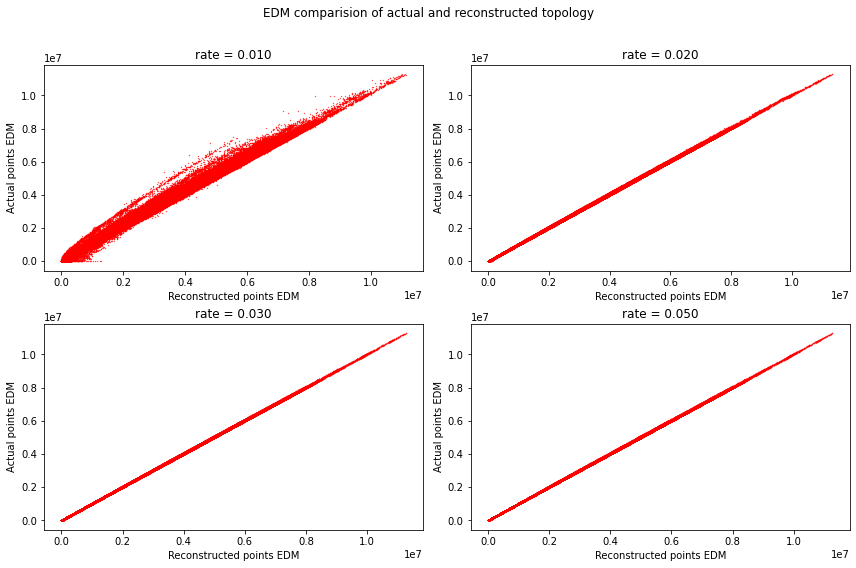

In [24]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
for i in range(len(outputs1)):
    output = outputs1[i]
    dact = np.tril(solver.getEDM(output['points'])).ravel()
    dObs = np.tril(solver.getEDM(output['tpoints'])).ravel() 
    ax[int(i/2),int(i%2)].scatter(dObs,dact,color='r',s=0.1)
    ax[int(i/2),int(i%2)].set_title('rate = %.3f'%output['rate'])
    ax[int(i/2),int(i%2)].set_xlabel('Reconstructed points EDM')
    ax[int(i/2),int(i%2)].set_ylabel('Actual points EDM')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('EDM comparision of actual and reconstructed topology')
plt.show()

### Coordinate Error CDF

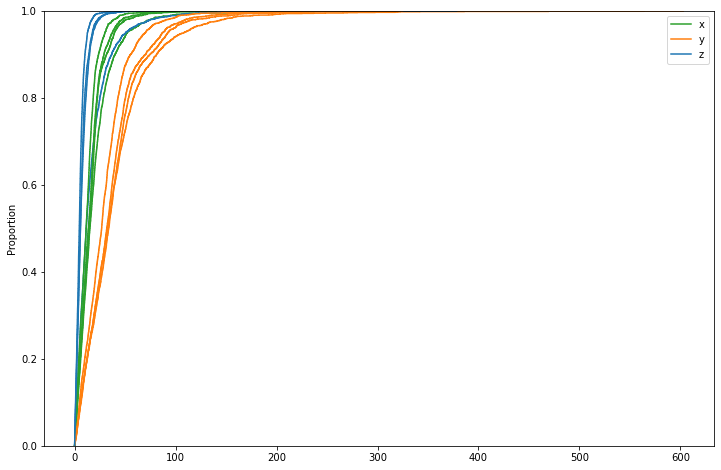

In [25]:
plt.figure(figsize=(12,8))
for i in range(len(outputs1)):
    sns.ecdfplot((abs(outputs1[i]['points'] - outputs1[i]['tpoints'])))
plt.legend(['x','y','z'])
plt.show()

Here we have taken India cities Latitudes and Longitudes and sampled them to obtain our dataset. The EDM after construction has been sampled at various rates and the following errors and properties have been noted.

In [26]:
print('Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)')
for output in outputs1:
    print("%0.2f   %0.2f   %0.7f       %0.2f         %0.4f"%(output['rate'],output['ratio'],output['error']*100,output['numit'],output['timeelapsed']))

Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)
0.01   0.99   1.0994404       19.00         29.2304
0.02   1.98   0.7978092       16.00         32.7008
0.03   2.99   0.8518338       16.00         34.3210
0.05   5.02   0.6650077       19.00         57.8823


## Error Analysis: Dataset 2

### Defining EDMSolver Class Parameters

In [27]:
opts = params()
lsopts = params()

# Matrix Completion parameters
opts.lambda_ = 5
# opts.rate = 0.02
opts.printenergy = 0
opts.plotting = 0
opts.rank = 10
opts.maxit = 30
opts.tol = 1e-5

# BBGradient parameters
lsopts.maxit = 20
lsopts.xtol = 1e-8
lsopts.gtol = 1e-8 
lsopts.ftol = 1e-10 
lsopts.alpha  = 1e-3 
lsopts.rho  = 1e-4 
lsopts.sigma  = 0.1 
lsopts.eta  = 0.8 

### Defining and Running the Solver

In [28]:
outputs2 = []
rates2 = [0.01,0.02,0.03,0.05]

points = np.genfromtxt('./data/pipe.csv', delimiter=',')

for rate in rates2:
    opts.rate = rate
    solver = EDMSolver(points,opts,lsopts)
    output = solver.run()
    outputs2.append(output)

1.002312 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...
1.998138 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...
3.017235 percent of the EDM Distances are known

5.010223 percent of the EDM Distances are known



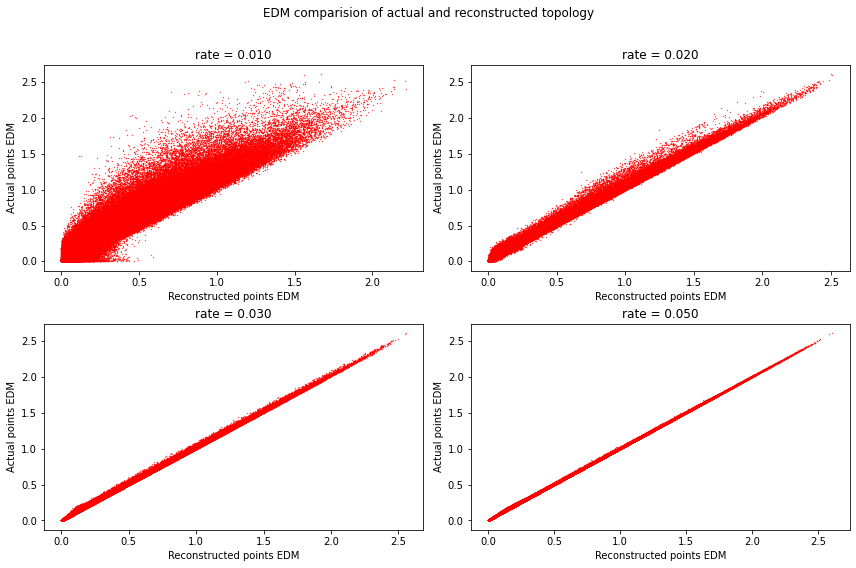

In [29]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
for i in range(len(outputs2)):
    output = outputs2[i]
    dact = np.tril(solver.getEDM(output['points'])).ravel()
    dObs = np.tril(solver.getEDM(output['tpoints'])).ravel() 
    ax[int(i/2),int(i%2)].scatter(dObs,dact,color='r',s=0.1)
    ax[int(i/2),int(i%2)].set_title('rate = %.3f'%output['rate'])
    ax[int(i/2),int(i%2)].set_xlabel('Reconstructed points EDM')
    ax[int(i/2),int(i%2)].set_ylabel('Actual points EDM')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('EDM comparision of actual and reconstructed topology')
plt.show()

### Coordinate Error CDF

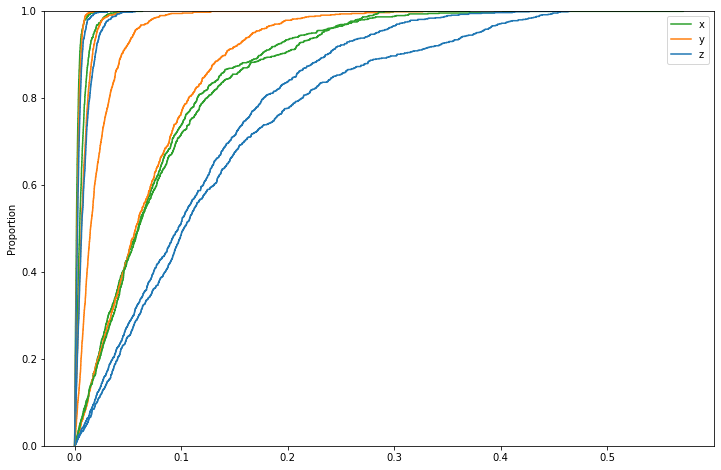

In [30]:
plt.figure(figsize=(12,8))
for output in outputs2:
    sns.ecdfplot((abs(output['points'] - output['tpoints'])))
plt.legend(['x','y','z'])
plt.show()

In [31]:
print('Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)')
for output in outputs2:
    print("%0.2f   %0.2f   %0.7f       %0.2f         %0.4f"%(output['rate'],output['ratio'],output['error']*100,output['numit'],output['timeelapsed']))

Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)
0.01   1.00   21.3511732       30.00         7.6700
0.02   2.00   22.1612297       28.00         8.1524
0.03   3.02   2.0046797       19.00         6.7776
0.05   5.01   0.7753925       15.00         6.2720


## Error Analysis: Dataset 3

### Defining EDMSolver Class Parameters

In [32]:
opts = params()
lsopts = params()

opts.lambda_ = 5
# opts.rate = 0.4
opts.printenergy = 0
opts.plotting = 0
opts.rank = 10
opts.maxit = 30
opts.tol = 1e-5

lsopts.maxit = 20
lsopts.xtol = 1e-8
lsopts.gtol = 1e-8 
lsopts.ftol = 1e-10 
lsopts.alpha  = 1e-3 
lsopts.rho  = 1e-4 
lsopts.sigma  = 0.1 
lsopts.eta  = 0.8 

### Defining and Running the Solver

In [33]:
outputs3 = []
outputdata = []
rates3 = [0.4,0.6,0.8,1]

for rate in rates3:
    opts.rate = rate
    solver = EDMSolver(points3,opts,lsopts)
    output = solver.run()
    outputs3.append(output)

41.777778 percent of the EDM Distances are known

58.666667 percent of the EDM Distances are known

74.666667 percent of the EDM Distances are known

93.333333 percent of the EDM Distances are known



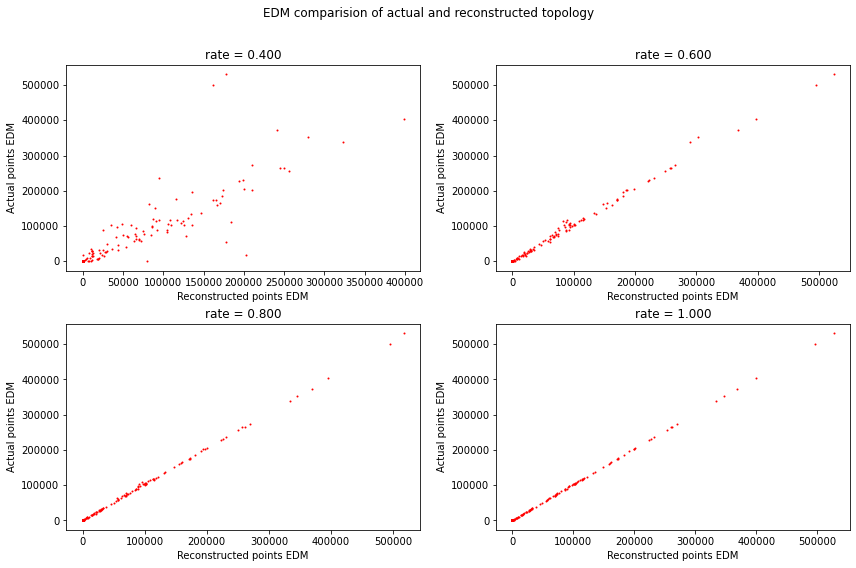

In [34]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
for i in range(len(outputs3)):
    output = outputs3[i]
    dact = np.tril(solver.getEDM(output['points'])).ravel()
    dObs = np.tril(solver.getEDM(output['tpoints'])).ravel() 
    ax[int(i/2),int(i%2)].scatter(dObs,dact,color='r',s=1)
    ax[int(i/2),int(i%2)].set_title('rate = %.3f'%output['rate'])
    ax[int(i/2),int(i%2)].set_xlabel('Reconstructed points EDM')
    ax[int(i/2),int(i%2)].set_ylabel('Actual points EDM')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('EDM comparision of actual and reconstructed topology')
plt.show()

### Coordinate Error CDF

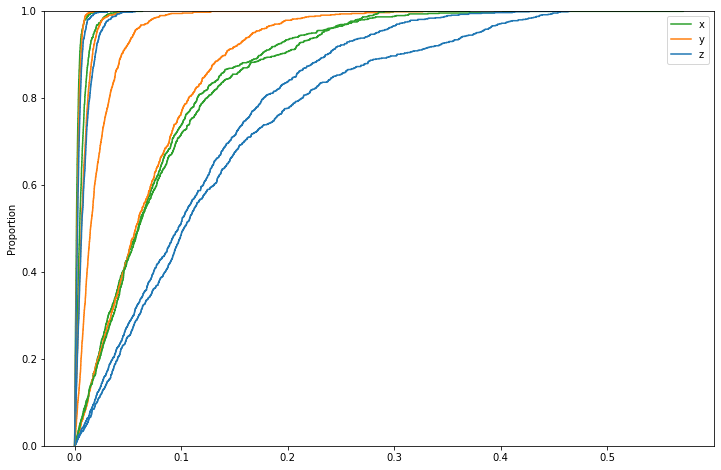

In [35]:
plt.figure(figsize=(12,8))
for output in outputs2:
    sns.ecdfplot((abs(output['points'] - output['tpoints'])))
plt.legend(['x','y','z'])
plt.show()

In [36]:
print('Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)')
for output in outputs3:
    print("%0.2f   %0.2f   %0.7f       %0.2f         %0.4f"%(output['rate'],output['ratio'],output['error']*100,output['numit'],output['timeelapsed']))

Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)
0.40   41.78   2.2919492       5.00         0.0140
0.60   58.67   0.3994958       11.00         0.0299
0.80   74.67   0.1712731       8.00         0.0219
1.00   93.33   0.0687895       5.00         0.0150


## Error Analysis: Dataset 4

### Defining EDMSolver Class Parameters

In [37]:
opts = params()
lsopts = params()

opts.lambda_ = 5
# opts.rate = 0.4
opts.printenergy = 0
opts.plotting = 0
opts.rank = 10
opts.maxit = 30
opts.tol = 1e-5

lsopts.maxit = 20
lsopts.xtol = 1e-8
lsopts.gtol = 1e-8 
lsopts.ftol = 1e-10 
lsopts.alpha  = 1e-3 
lsopts.rho  = 1e-4 
lsopts.sigma  = 0.1 
lsopts.eta  = 0.8

### Defining and Running the Solver

In [38]:
outputs4 = []
rates4 = [0.01,0.02,0.03,0.05]

for rate in rates4:
    opts.rate = rate
    solver = EDMSolver(points4,opts,lsopts)
    output = solver.run()
    outputs4.append(output)

0.998259 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...
2.001472 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...
3.002135 percent of the EDM Distances are known

4.999413 percent of the EDM Distances are known

det(R) < R, reflection detected!, correcting for it ...


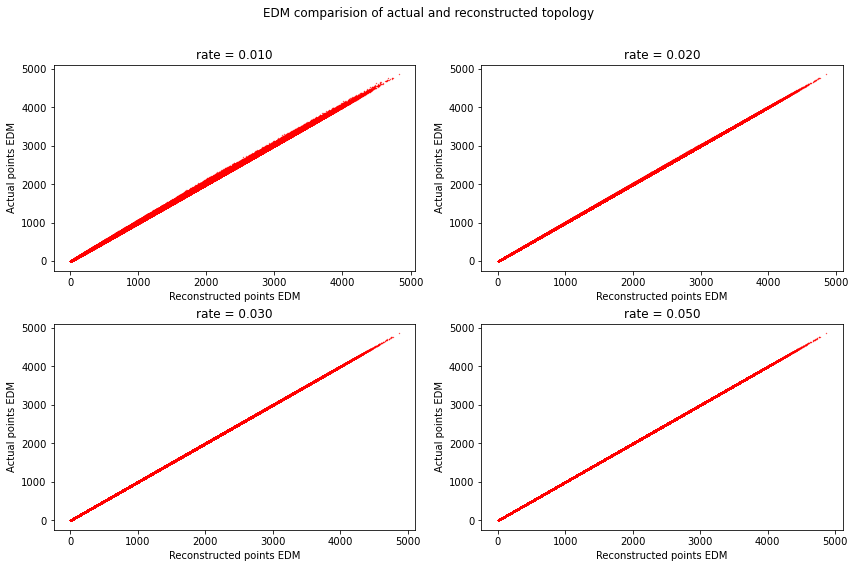

In [39]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
fig.suptitle('EDM comparision of actual and reconstructed topology')
for i in range(len(outputs4)):
    output = outputs4[i]
    dact = np.tril(solver.getEDM(output['points'])).ravel()
    dObs = np.tril(solver.getEDM(output['tpoints'])).ravel() 
    ax[int(i/2),int(i%2)].scatter(dObs,dact,color='r',s=0.1)
    ax[int(i/2),int(i%2)].set_title('rate = %.3f'%output['rate'])
    ax[int(i/2),int(i%2)].set_xlabel('Reconstructed points EDM')
    ax[int(i/2),int(i%2)].set_ylabel('Actual points EDM')

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

### Coordinate Error CDF

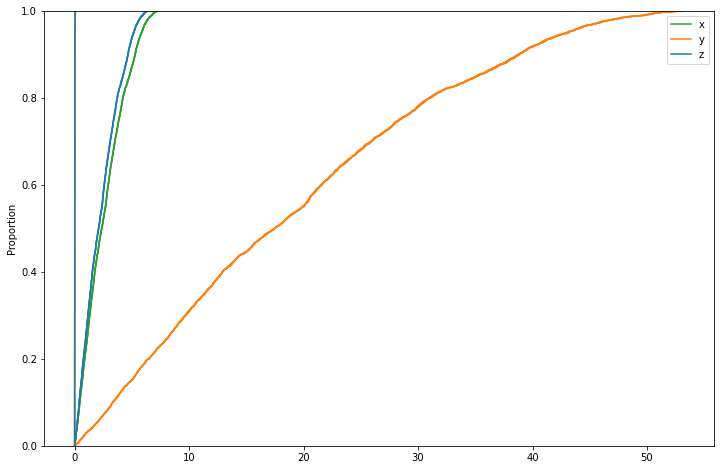

In [40]:
plt.figure(figsize=(12,8))
for output in outputs4:
    sns.ecdfplot((abs(output['points'] - output['tpoints'])))
plt.legend(['x','y','z'])
plt.show()

In [41]:
print('Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)')
for output in outputs4:
    print("%0.2f   %0.2f   %0.7f       %0.2f         %0.4f"%(output['rate'],output['ratio'],output['error']*100,output['numit'],output['timeelapsed']))

Rate   Ratio    Error(%)   Num Iterations Time Elapsed(s)
0.01   1.00   47.7290209       14.00         66.8547
0.02   2.00   47.8567700       12.00         69.5083
0.03   3.00   0.0577544       15.00         103.2109
0.05   5.00   47.8917195       22.00         179.7898


# observations

We can see that the errors plotted for the 4 datasets in the above run is tabularised as follows

Table 1 : Dataset 1

| Rate | Ratio |   Error(%)  |    Num Iterations | Time Elapsed(s) |
|------|-------|-------------|-------------------|-----------------|
|0.01 |0.99 |  1.0994404   |   19.00   |    29.2304|
|0.02 |1.98 |  0.7978092   |   16.00   |    32.7008|
|0.03 |2.99 |  0.8518338   |   16.00   |    34.3210|
|0.05 |5.02 |  0.6650077   |   19.00   |    57.8823|



It is evident that as the sampling rate, the number of entries from the EDM matrix increased , the performance of our algorithm has increased considerably. However there is a improvement in error as we move from 0.03 to 0.05 sampling rate. This could be due to randomised algorithm which we are using to label some our EDM matrix entries as
missing. It could be possible that the data available was not representative enough of the spatial orientation. This introduces another problem of identifying the crucial edges of our topology which play an important role in our algorithm.


Table 2 : Dataset 2


| Rate | Ratio |   Error(%)  |    Num Iterations | Time Elapsed(s) |
|------|-------|-------------|-------------------|-----------------|
|0.01 |1.00 |  21.3511732  |     30.00     |    7.6700|
|0.02 |2.00 |  22.1612297  |     28.00     |    8.1524|
|0.03 |3.02 |  2.0046797   |     19.00     |    6.7776|
|0.05 |5.01 |  0.7753925   |     15.00     |    6.2720|

We see a perfect decrease in error as the sample rating increases, almost near ideal accuracies as we approach a sampling rate of 5%. This is in line with our expected observations. 



Table 3 : Dataset 3 

| Rate | Ratio |   Error(%)  |    Num Iterations | Time Elapsed(s) |
|------|-------|-------------|-------------------|-----------------|
|0.40  |41.78 | 2.2919492    |   5.00     |    0.0140|
|0.60  |58.67 | 0.3994958    |   11.00    |    0.0299|
|0.80  |74.67 | 0.1712731    |   8.00     |    0.0219|
|1.00  |93.33 | 0.0687895    |   5.00     |    0.0150|

Since this is a very small dataset in comparison to our previous ones, we had to use 10-50 times the sampling rate in the previous datasets. This is because as the number of points decreases, the total number of connections also decrease and thus our solver has much lesser data to work with. Reasonable accuracies were obtained with about 40% of the data which is acceptable in most real life applications.


Table 4 : Dataset 4

| Rate | Ratio |   Error(%)  |    Num Iterations | Time Elapsed(s) |
|------|-------|-------------|-------------------|-----------------|
|0.01  |1.00 | 47.7290209  |    14.00     |    66.8547|
|0.02  |2.00 | 47.8567700  |    12.00     |    69.5083|
|0.03  |3.00 | 0.0577544   |    15.00     |   103.2109|
|0.05  |5.00 | 47.8917195  |    22.00     |   179.7898|

We found this dataset interesting because it is one of the state-of-the-art applications of our algorithm. From NMR spectral data we derived the molecular conformation of "HAEMOGLOBIN IN THE DEOXY QUATERNARY STATE WITH LIGAND BOUND AT THE ALPHA HAEMS". However, we can see that the error is not that fancy, this could be because the intra molecular distance is very very small (~$10^{-10}$) and any small deviations due to our calculations of the euclidean distance will results in huge margin for our relative error that is being calculated in this case.

# Conclusions

Our error that is being calculated is not a precise measure of our algorithm because of a few inherent flaws in it. 
<ol>
<li>One of the major issues is that it is always possible that some set of distance matrix entries are more important and representative our of data than another one. Hence we are leaving the performance of our algorithm at random when we start from a point cloud (All these datasets). However, in most real life applications we start with an EDM matrix and hence this should not be a problem for our algorithm.
  </li>
 <li>Another important issue we are dealing with is the normalising of EDM matrix and subsequent scaling of the output point matrix obtained. These rounding off may seem small to the naked  eye but we can see that we are using the kilometers as a basic unit for our algorithm (For datasets 1 and 3). A small variation in this about ~$10^{-2}$ could results in deviations of about 10 metres.
 </li>

# Future extensions for our project

<ol>
    <li> Identify the crucial edges for our topology by generating the performance data of our algorithm with different sets of entries in our EDM matrix and its parameters and training an ML model using this data to assign an importance factor to each of these EDM matrix entries 
    </li>
    <li> Dynamic reconstruction of the topology of moving nodes using IMU data obtained.
    </li>

# References

<ol>
    <li> A. Tasissa and R. Lai, "Exact Reconstruction of Euclidean Distance Geometry Problem Using Low-Rank Matrix Completion," in IEEE Transactions on Information Theory, vol. 65, no. 5, pp. 3124-3144, May 2019, doi: 10.1109/TIT.2018.2881749.</li>
    <li> J. Barzilai and J. M. Borwein, “Two-point step size gradient methods,”
        IMA J. Numer. Anal., vol. 8, no. 1, pp. 141–148, 1988. </li>
    <li> I. Dokmanic, R. Parhizkar, J. Ranieri and M. Vetterli, "Euclidean Distance Matrices: Essential theory, algorithms, and applications," in IEEE Signal Processing Magazine, vol. 32, no. 6, pp. 12-30, Nov. 2015, doi: 10.1109/MSP.2015.2398954.</li>
    <li> Rigid Transform 3D - https://github.com/nghiaho12/rigid_transform_3D </li>
    <li> Dataset 1 - https://www.kaggle.com/max-mind/world-cities-database </li>
    <li> Dataset 2 - https://www.kaggle.com/aalborguniversity/sewerpointclouds </li>
    <li> Dataset 4 - https://www.rcsb.org/structure/1COH </li>
</ol>